In [75]:
import numpy as np

from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import os
import time
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Optimizer ตัวใหม่

In [76]:
class GradientDescent(object):
    
    def __init__(self):
        
        self.loss_history = []
        self.weigths_history = []
        self.biases_history = []
        self.lr = 0.0001
        
        
        self.x = None
        self.y = None
        
        self.t = 5
        
        """กำหนดค่า การ Random Weigths เเละ biases"""
        
        self.weigth1 = np.random.uniform(-2, 2, size = (1, 1))
        self.weigth2 = np.random.uniform(-2, 2, size = (1, 1))
        
        self.biases = np.random.uniform(-2, 2, size = (1, 1))
        
        '''New Relu Search Weigths'''
        self.weigths = self.weigth1 + 0.2 * (self.weigth1 - self.weigth2)
        
    
    def sigmoid (self, x):
        
        return 1/(1 + np.exp(-x))
    
    
    def inear_run(self, datas):
        
        ''' หาคำตอบของ LinearRegression '''
        y_predic = np.dot(datas, self.weigths) + self.biases

        
        return y_predic
        
    def update_history(self, loss, weigths, biases):
        
        """บันทึกค่า loss เเละ weiths เเละ biases"""
        
        self.loss_history.append(loss)
        self.weigths_history.append(weigths)
        self.biases_history.append(biases)
        
    
    def loss_derivative(self):
        
        ''' การหา อนุพันของ Gt'''
        
        dw = np.mean((self.y_predic - self.y) * self.x)
        db = np.mean(self.y_predic - self.y)

        return dw, db
    
    def gradient_descent(self):
        ''' ถ้ามีการเรียน ใช้ function นี้จะให้ update weigth ด้วย algorithm GD'''
        
        ''' w_old = w_new - learning_rate *dL/dw'''
        '''
        self.weigths = self.weigths - self.lr * self.dw
        self.biases = self.biases - self.lr * self.db
        '''
        
        self.weigths = self.weigths - self.lr * self.dw
        self.weigths = (1 - 1/self.t) * (self.weigths + 1/self.t *self.weigth1)
        self.t = self.t + 1
        self.biases = self.biases - self.lr * self.db
        
        
        
    
    def loss_function(self, y_prediction, y):
        '''MSE'''
        loss = 0.5* np.mean((y_prediction - y)**2)
        return loss
        
        
    def fit(self ,data_x, data_y, epoch):
        pre_loss = 0.0
        self.x = data_x
        self.y = data_y
        
        for i in range(epoch):
            
            self.y_predic = self.inear_run(self.x)
            
            ''' เปลี่ยนจาก Linear ให้เป็น None Lineaer ด้วย sigmod'''
            self.y_predic = self.sigmoid(self.y_predic)
            
            self.loss = self.loss_function(self.y_predic, self.y)
            self.update_history(self.loss, self.weigths, self.biases)
            
            self.dw, self.db = self.loss_derivative()
            self.gradient_descent()
            
            pre_loss = self.loss
            
            print(f'Epoch {i} Loss {pre_loss}')
    

In [77]:
#Generate Date to train
import numpy as np
observation = 1000 #ตัวเเปรนี้จะบอกขนาดของข้อมูล
#np.random.uniform(low, high, size) self.weigths, self.biases = Optimizer(learning_rate = 0.3,
                                            

xs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#xs 1000x1
zs = np.random.uniform(low = -10, high = 10, size = (observation, 1))
#zs 1000x1
inputs = np.column_stack((xs, zs))# ตัวเเปรนี้รวม xs, zs เข้าด้วยกัน

# ค่า input k = 2
# จำนวนobservation n = 1000

#Create date target 
#targets = f(x,z) = 2*x - 3*z +5  + noise
#2* คือ w1, 3* คือ w2, 5 คือ bias
noise = np.random.uniform(-1, 1, (observation,1 ))

targets = 2*xs - 3*zs + 5 + noise
# ค่าoutput m = 1

init_range = 0.1
learning_rate = 0.01
n = 1000
k = 2
m = 1
#weights = np.random.uniform(low = -init_range, high = init_range, size=(2, 1))
#weights = np.random.uniform(low = -init_range, high = init_range, size=(k, m))
#biases = np.random.uniform(low = -init_range, high = init_range, size = (1, 1))
#biases = np.random.uniform(low = -init_range, high = init_range, size = (1, m))

In [78]:
X = np.random.rand(1000, 1)
Y = np.sin(2 * np.pi * X) + 4 * np.random.rand(1000, 1)

In [79]:
print(f'Shape X{X.shape}\nShape Y {Y.shape}')

Shape X(1000, 1)
Shape Y (1000, 1)


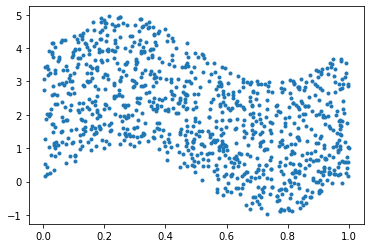

In [80]:
plt.plot(X, Y, '.')
plt.show()

In [81]:
inputs.shape

(1000, 2)

In [82]:
targets.shape

(1000, 1)

# Train Optimizer ตัวใหม่

In [83]:
model = GradientDescent()
model.fit(X, Y, 200)

Epoch 0 Loss 1.5824439470281595
Epoch 1 Loss 1.5870032371051255
Epoch 2 Loss 1.5899155555986475
Epoch 3 Loss 1.59189357058892
Epoch 4 Loss 1.5932990700018081
Epoch 5 Loss 1.5943327383639907
Epoch 6 Loss 1.5951136984564487
Epoch 7 Loss 1.5957165424445021
Epoch 8 Loss 1.5961900435179655
Epoch 9 Loss 1.5965672529102406
Epoch 10 Loss 1.5968712501841005
Epoch 11 Loss 1.5971185689678074
Epoch 12 Loss 1.5973213173755745
Epoch 13 Loss 1.597488534318457
Epoch 14 Loss 1.59762708218027
Epoch 15 Loss 1.5977422492400384
Epoch 16 Loss 1.5978381653171883
Epoch 17 Loss 1.5979180942591147
Epoch 18 Loss 1.5979846434333813
Epoch 19 Loss 1.598039916185021
Epoch 20 Loss 1.5980856244004762
Epoch 21 Loss 1.598123172716717
Epoch 22 Loss 1.5981537222797622
Epoch 23 Loss 1.5981782395545183
Epoch 24 Loss 1.598197534072288
Epoch 25 Loss 1.598212287898426
Epoch 26 Loss 1.5982230788372984
Epoch 27 Loss 1.5982303988538675
Epoch 28 Loss 1.598234668808496
Epoch 29 Loss 1.598236250326021
Epoch 30 Loss 1.598235455419608

# Optimizer GradientDescent

In [84]:
class GradientDescent(object):
    
    def __init__(self):
        
        self.loss_history = []
        self.weigths_history = []
        self.biases_history = []
        self.lr = 0.0001
        
        
        self.x = None
        self.y = None
        
        self.t = 5
        
        """กำหนดค่า การ Random Weigths เเละ biases"""
        '''
        self.weigth1 = np.random.uniform(-2, 2, size = (1, 1))
        self.weigth2 = np.random.uniform(-2, 2, size = (1, 1))
        '''
        
        
        self.weigths =  np.random.uniform(-2, 2, size = (1, 1))
        self.biases = np.random.uniform(-2, 2, size = (1, 1))
        
        '''
        New Relu Search Weigths
        self.weigths = self.weigth1 + 0.2 * (self.weigth1 - self.weigth2)

        '''
        
    
    def sigmoid (self, x):
        
        return 1/(1 + np.exp(-x))
    
    
    def inear_run(self, datas):
        
        ''' หาคำตอบของ LinearRegression '''
        y_predic = np.dot(datas, self.weigths) + self.biases

        
        return y_predic
        
    def update_history(self, loss, weigths, biases):
        
        """บันทึกค่า loss เเละ weiths เเละ biases"""
        
        self.loss_history.append(loss)
        self.weigths_history.append(weigths)
        self.biases_history.append(biases)
        
    
    def loss_derivative(self):
        
        ''' การหา อนุพันของ Gt'''
        
        dw = np.mean((self.y_predic - self.y) * self.x)
        db = np.mean(self.y_predic - self.y)

        return dw, db
    
    def gradient_descent(self):
        ''' ถ้ามีการเรียน ใช้ function นี้จะให้ update weigth ด้วย algorithm GD'''
        
        ''' w_old = w_new - learning_rate *dL/dw'''
        '''
        self.weigths = self.weigths - self.lr * self.dw
        self.biases = self.biases - self.lr * self.db
        '''
        
        self.weigths = self.weigths - self.lr * self.dw
        self.biases = self.biases - self.lr * self.db
        
        
    
    def loss_function(self, y_prediction, y):
        '''MSE'''
        loss = 0.5* np.mean((y_prediction - y)**2)
        return loss
        
        
    def fit(self ,data_x, data_y, epoch):
        pre_loss = 0.0
        self.x = data_x
        self.y = data_y
        
        for i in range(epoch):
            
            self.y_predic = self.inear_run(self.x)
            
            ''' เปลี่ยนจาก Linear ให้เป็น None Lineaer ด้วย sigmod'''
            self.y_predic = self.sigmoid(self.y_predic)
            
            self.loss = self.loss_function(self.y_predic, self.y)
            self.update_history(self.loss, self.weigths, self.biases)
            
            self.dw, self.db = self.loss_derivative()
            self.gradient_descent()
            
            pre_loss = self.loss
            
            print(f'Epoch {i} Loss {pre_loss}')
    

# Train Gradient Descent

In [85]:
model = GradientDescent()
model.fit(X, Y, 200)

Epoch 0 Loss 1.817884318201348
Epoch 1 Loss 1.8178389508763149
Epoch 2 Loss 1.817793588352715
Epoch 3 Loss 1.817748230630315
Epoch 4 Loss 1.8177028777088813
Epoch 5 Loss 1.817657529588181
Epoch 6 Loss 1.8176121862679802
Epoch 7 Loss 1.8175668477480458
Epoch 8 Loss 1.8175215140281433
Epoch 9 Loss 1.8174761851080399
Epoch 10 Loss 1.8174308609875012
Epoch 11 Loss 1.8173855416662925
Epoch 12 Loss 1.8173402271441805
Epoch 13 Loss 1.8172949174209303
Epoch 14 Loss 1.8172496124963078
Epoch 15 Loss 1.8172043123700783
Epoch 16 Loss 1.8171590170420073
Epoch 17 Loss 1.81711372651186
Epoch 18 Loss 1.8170684407794016
Epoch 19 Loss 1.8170231598443967
Epoch 20 Loss 1.8169778837066106
Epoch 21 Loss 1.8169326123658076
Epoch 22 Loss 1.8168873458217532
Epoch 23 Loss 1.8168420840742106
Epoch 24 Loss 1.8167968271229453
Epoch 25 Loss 1.8167515749677219
Epoch 26 Loss 1.816706327608303
Epoch 27 Loss 1.816661085044454
Epoch 28 Loss 1.8166158472759386
Epoch 29 Loss 1.8165706143025204
Epoch 30 Loss 1.816525386123